# **7. Bài tập**
**Sinh viên chạy lại tập dữ liệu [CIC IDS 2018](https://www.unb.ca/cic/datasets/ids-2018.html) trên mô hình bài lab này.**



## a. Lấy dữ liệu từ CIC IDS 2018


### To download this dataset <trích từ link trên>

- Install the AWS CLI, available on Mac, Windows and Linux
- Run: `aws s3 sync --no-sign-request --region <your-region> "s3://cse-cic-ids2018/" dest-dir`(Where **your-region** is your region from the [AWS regions list](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/using-regions-availability-zones.html#concepts-regions) and **dest-dir** is the name of the desired destination folder in your machine)
- Download AWS CLI: https://docs.aws.amazon.com/cli/latest/userguide/getting-started-install.html#cliv2-linux-install

In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [ ]:
%cd /content/drive/MyDrive/lab_dataset/Lab5/aws
!curl "https://awscli.amazonaws.com/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip"
!unzip -o awscliv2.zip

Streaming output truncated to the last 5000 lines.
  inflating: aws/dist/awscli/examples/apigatewayv2/create-deployment.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/update-domain-name.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/untag-resource.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/get-authorizer.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/update-stage.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/delete-route.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/update-deployment.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/get-deployments.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/create-route.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/delete-integration.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/get-authorizers.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/create-authorizer.rst  
  inflating: aws/dist/awscli/examples/apigatewayv2/import-api.rst  
  in

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ./aws/install # --update

You can now run: /usr/local/bin/aws --version


In [ ]:
! /usr/local/bin/aws --version

aws-cli/2.15.47 Python/3.11.8 Linux/6.1.58+ exe/x86_64.ubuntu.22 prompt/off


In [ ]:
!aws s3 ls --no-sign-request --region us-east-2 "s3://cse-cic-ids2018/" # Dùng lệnh "ls" để xem list danh sách file và thư mục

                           PRE Original Network Traffic and Log data/
                           PRE Processed Traffic Data for ML Algorithms/


Chúng ta tập trung vào xử lý file csv đã được xử lý tại thư mục "PRE Processed Traffic Data for ML Algorithms/". (Bỏ qua file RAW)

In [ ]:
!aws s3 ls --no-sign-request --region us-east-2 "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/"

2018-10-11 16:02:25          0 
2018-10-11 16:02:49  352368373 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
2018-10-11 16:03:10  333723605 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
2018-10-11 16:03:33  382840456 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
2018-10-11 16:03:59 4054925350 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
2018-10-11 16:08:38  107842858 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
2018-10-11 16:08:48  375945899 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
2018-10-11 16:09:20  382636202 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
2018-10-11 16:09:44  358223333 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
2018-10-11 16:10:12  328893673 Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
2018-10-11 16:10:33  209249758 Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv


(Tùy chọn) Download hết dataset (Nếu thích, nhưng sẽ rất nặng)

In [ ]:
!aws s3 sync --no-sign-request --region us-east-2 "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/" ../Dataset

download: s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv to ../Dataset/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
download: s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv to ../Dataset/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
cancelled: ctrl-c received                                      


Download với 1 file để thực hiện bài lab

In [ ]:
!aws s3 sync --no-sign-request --region us-east-2 --exclude "*" --include "Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv" "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/" /content/drive/MyDrive/lab_dataset/Lab5

Traceback (most recent call last):
  File "PyInstaller/loader/pyiboot01_bootstrap.py", line 78, in <module>
  File "PyInstaller/loader/pyimod03_ctypes.py", line 27, in install
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "PyInstaller/loader/pyimod02_importers.py", line 385, in exec_module
  File "ctypes/__init__.py", line 514, in <module>
  File "ctypes/__init__.py", line 503, in PYFUNCTYPE
KeyboardInterrupt
[1214] Failed to execute script 'pyiboot01_bootstrap' due to unhandled exception!


Sử dụng 1 file CSV để phân tích và làm dataset

## b. Đọc và xem thông tin dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.utils import get_file

In [ ]:
#Load Dataset
df = pd.read_csv("/content/drive/MyDrive/lab_dataset/Lab5/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv", nrows=200000)
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,53,17,15/02/2018 09:20:30,37205,1,1,32,154,32,32,...,8,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
199996,53,17,15/02/2018 09:47:06,1136,1,1,31,112,31,31,...,8,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
199997,53,17,15/02/2018 08:30:08,23786,1,1,34,139,34,34,...,8,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
199998,53,17,15/02/2018 09:06:27,483,1,1,36,52,36,36,...,8,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           200000 non-null  int64  
 1   Protocol           200000 non-null  int64  
 2   Timestamp          200000 non-null  object 
 3   Flow Duration      200000 non-null  int64  
 4   Tot Fwd Pkts       200000 non-null  int64  
 5   Tot Bwd Pkts       200000 non-null  int64  
 6   TotLen Fwd Pkts    200000 non-null  int64  
 7   TotLen Bwd Pkts    200000 non-null  int64  
 8   Fwd Pkt Len Max    200000 non-null  int64  
 9   Fwd Pkt Len Min    200000 non-null  int64  
 10  Fwd Pkt Len Mean   200000 non-null  float64
 11  Fwd Pkt Len Std    200000 non-null  float64
 12  Bwd Pkt Len Max    200000 non-null  int64  
 13  Bwd Pkt Len Min    200000 non-null  int64  
 14  Bwd Pkt Len Mean   200000 non-null  float64
 15  Bwd Pkt Len Std    200000 non-null  float64
 16  Fl

In [ ]:
df.groupby('Label')['Label'].count()

Label
Benign                   147502
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64

In [ ]:
# prompt: mapping value trong cột lable sang index

mapping = {
    'Benign': 1,
    'DoS attacks-GoldenEye': 2,
    'DoS attacks-Slowloris': 3
}
df['Label'] = df['Label'].map(mapping)
df.head()


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,1
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,1
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,1
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,1
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,1


## c. Xử lý dữ liệu

In [ ]:
# Xóa các cột chỉ có 1 giá trị
def distinct_val_of_columns(dataset):
    columns = dataset.columns
    num_val = []
    for column in columns:
        num_val.append(len(dataset[column].unique()))

    col_val_df = pd.DataFrame({'Column': columns, 'Distinct Value': num_val})
    single_val_cols = col_val_df[col_val_df['Distinct Value'] == 1]
    return col_val_df, single_val_cols

In [ ]:
# Xóa các cột chỉ có 1 giá trị
col_val_df, single_val_cols = distinct_val_of_columns(df)
df = df.drop(columns= single_val_cols['Column'].values)

# Sắp xếp các record theo thời gian
df = df.sort_values(by=["Timestamp"], ascending=True)

df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
108690,3389,6,15/02/2018 01:00:00,3686219,10,11,1272,1893,677,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
95790,3389,6,15/02/2018 01:00:01,2465495,8,7,1128,1581,661,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
65323,3389,6,15/02/2018 01:00:01,2502937,8,7,1128,1581,661,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
136781,51773,6,15/02/2018 01:00:01,3,3,0,31,0,31,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
188146,80,6,15/02/2018 01:00:02,79,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79503,3389,6,15/02/2018 12:59:57,1584311,8,7,1132,1581,661,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
124787,3389,6,15/02/2018 12:59:57,2841919,8,7,1128,1581,661,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
128060,3389,6,15/02/2018 12:59:57,3452438,11,12,2632,1677,677,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
82070,51268,6,15/02/2018 12:59:59,46,1,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [ ]:
df.drop('Timestamp', axis=1, inplace=True)

In [ ]:
# loại bỏ NA
df.dropna(inplace=True,axis=1)
df.shape

(200000, 68)

## d. Encode dữ liệu số và chữ

In [ ]:
# Encode các number values
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

# Encode cho categorical values
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [ ]:
text_col = []

# Nếu có cột là kiểu dữ liệu object và không xử lý được thì cho các cột này vào `text_col`, may mắn thay, dataset của ta không có cột nào chứa kiểu 'object'
for i in range(df.shape[1]):
  if str(df.dtypes[i]) != "int64" and str(df.dtypes[i]) != "float64":
    if str(df.columns[i]) != "Label":
      text_col.append(df.columns[i])

In [ ]:
text_col

[]

In [ ]:
#encoding feature vector
for i in df.columns:
  if i not in text_col:
    if i != 'Label':
      encode_numeric_zscore(df, i)

for x in text_col:
  encode_text_dummy(df, x)

In [ ]:
df.dropna(inplace=True,axis=1)
df[0:5]

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
108690,-0.146828,-0.557717,-0.382600,0.166139,0.053989,0.005821,-0.020829,1.265176,-0.502715,0.816554,...,0.008693,-0.196099,-0.187984,-0.213869,-0.177945,-0.356449,-0.176218,-0.372576,-0.332321,Benign
95790,-0.146828,-0.557717,-0.417813,0.098496,0.010222,0.003636,-0.023279,1.225087,-0.502715,0.964799,...,0.008693,-0.196099,-0.187984,-0.213869,-0.177945,-0.356449,-0.176218,-0.372576,-0.332321,Benign
65323,-0.146828,-0.557717,-0.416733,0.098496,0.010222,0.003636,-0.023279,1.225087,-0.502715,0.964799,...,0.008693,-0.196099,-0.187984,-0.213869,-0.177945,-0.356449,-0.176218,-0.372576,-0.332321,Benign
136781,2.938113,-0.557717,-0.488933,-0.070610,-0.066370,-0.013007,-0.035690,-0.353405,-0.502715,-0.438873,...,0.008693,-0.196099,-0.187984,-0.213869,-0.177945,-0.356449,-0.176218,-0.372576,-0.332321,Benign
188146,-0.357808,-0.557717,-0.488931,-0.104431,-0.066370,-0.013477,-0.035690,-0.431077,-0.502715,-0.549878,...,0.008693,-0.196099,-0.187984,-0.213869,-0.177945,-0.356449,-0.176218,-0.372576,-0.332321,Benign


In [ ]:
normal_mask = df['Label']=='Benign'
attack_mask = df['Label']!='Benign'

df.drop('Label',axis=1,inplace=True)

df_normal = df[normal_mask]
df_attack = df[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 147502
Attack count: 52498


In [ ]:
# feature vector
x_normal = df_normal.values
x_attack = df_attack.values

In [ ]:
from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(x_normal, test_size=0.3, random_state=12)

print(f"Normal train count: {len(x_normal_train)}")
print(f"Normal test count: {len(x_normal_test)}")

In [ ]:
x_normal_train.shape, x_normal_test.shape

((103251, 66), (44251, 66))

In [ ]:
#Chia tỷ lệ tập dữ liệu
from sklearn.preprocessing import MinMaxScaler

mmc = MinMaxScaler()

x_normal_train = mmc.fit_transform(x_normal_train)
x_normal_test = mmc.fit_transform(x_normal_test)
x_normal = mmc.fit_transform(x_normal)
x_attack = mmc.fit_transform(x_attack)

In [ ]:
x_normal_train = pd.DataFrame(x_normal_train)
x_normal_test = pd.DataFrame(x_normal_test)
x_attack = pd.DataFrame(x_attack)
x_normal = pd.DataFrame(x_normal)

In [ ]:
#Convert time step dữ liệu
def create_dataset(X, time_steps):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
    return np.array(Xs)

In [ ]:
# reshape [samples, time_steps, n_features]

TIME_STEPS = 1
Xnormal_train = create_dataset(x_normal_train, TIME_STEPS)
print(Xnormal_train.shape)

(103250, 1, 66)


In [ ]:
Xnormal_test = create_dataset(x_normal_test, TIME_STEPS)
print(Xnormal_test.shape)

(44250, 1, 66)


In [ ]:
Xattack = create_dataset(x_attack, TIME_STEPS)
print(Xattack.shape)

(52497, 1, 66)


In [ ]:
Xnormal = create_dataset(x_normal,TIME_STEPS)
print(Xattack.shape)

(52497, 1, 66)


## e. Mô hình LSTM Autoencder

In [ ]:


model = keras.Sequential() # Sử dụng model chuỗi, vì đây dạng dữ liệu liên tục được ghi nhận trong một khoảng thời gian
model.add(keras.layers.LSTM(units=64, input_shape=(Xnormal_train.shape[1], Xnormal_train.shape[2]))) # Đây là lớp điển hình của mô hình đang build, có tính chất nhớ từ kết quả training
model.add(keras.layers.Dropout(rate=0.2)) # Ngẫu nhiên loại bỏ một phần unit


model.add(keras.layers.RepeatVector(n=Xnormal_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True)) # Chỉnh 'unit' từ 32->64
model.add(keras.layers.Dropout(rate=0.2)) # Chỉnh từ 0.5->0.2
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=Xnormal_train.shape[2])))

model.compile(loss="mse", optimizer='adam', metrics=['accuracy']) # Ở đây loss function ta dùng 'mse' sẽ cho kết quả cao hơn và hội tụ nhanh hơn
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                33536     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 repeat_vector_1 (RepeatVec  (None, 1, 64)             0         
 tor)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_3 (Dropout)         (None, 1, 64)             0         
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 66)             4290      
 stributed)                                           

## f. Huấn luyện Model

In [ ]:
# traning model
history = model.fit(
    Xnormal_train, Xnormal_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    shuffle = False
)

Epoch 1/5
646/646 [==============================] - 15s 11ms/step - loss: 0.0062 - accuracy: 0.8015 - val_loss: 8.4194e-04 - val_accuracy: 0.8743
Epoch 2/5
646/646 [==============================] - 5s 7ms/step - loss: 0.0020 - accuracy: 0.8564 - val_loss: 5.6102e-04 - val_accuracy: 0.8915
Epoch 3/5
646/646 [==============================] - 7s 11ms/step - loss: 0.0017 - accuracy: 0.8524 - val_loss: 4.3187e-04 - val_accuracy: 0.8823
Epoch 4/5
646/646 [==============================] - 5s 7ms/step - loss: 0.0015 - accuracy: 0.8541 - val_loss: 3.7702e-04 - val_accuracy: 0.8961
Epoch 5/5
646/646 [==============================] - 5s 7ms/step - loss: 0.0014 - accuracy: 0.8532 - val_loss: 3.3369e-04 - val_accuracy: 0.8985


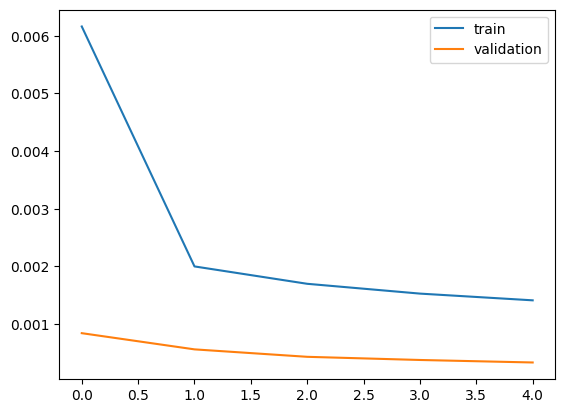

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

## g. Đánh giá model

In [ ]:
# model evalutation
X_train_pred = model.predict(Xnormal_train)

train_mse_loss = np.mean(np.abs(X_train_pred - Xnormal_train), axis=1)
train_mse_loss.shape

3227/3227 [==============================] - 12s 3ms/step


(103250, 66)

<ipython-input-50-fbd25b28dfa8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_mse_loss, bins=10, kde=True)


<Axes: ylabel='Density'>

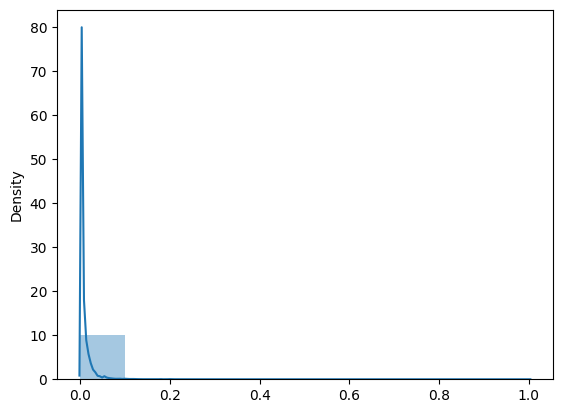

In [ ]:
sns.distplot(train_mse_loss, bins=10, kde=True)

In [ ]:
X_normal_pred = model.predict(Xnormal)

normal_mse_loss = np.mean(np.abs(X_normal_pred - Xnormal), axis=1)
normal_mse_loss.shape

4610/4610 [==============================] - 11s 2ms/step


(147501, 66)

<ipython-input-52-72f5463a8e3b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_mse_loss, bins=10, kde=True);


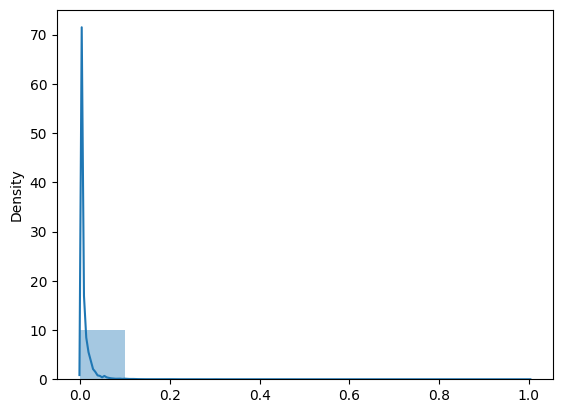

In [ ]:
sns.distplot(normal_mse_loss, bins=10, kde=True);

In [ ]:
score1 = model.evaluate(Xnormal_train, Xnormal_train)
print("\n Sample Loss(MSE) & Accuracy Scores (Train):", score1[0], score1[1], "\n")

score2 = model.evaluate(Xnormal_test, Xnormal_test)
print("\nOut of Sample Loss(MSE) & Accuracy Scores (Test):", score2[0], score2[1], "\n")

score3 = model.evaluate(Xattack, Xattack)
print("\nAttack Underway Loss(MSE) & Accuracy Scores (Anomaly):", score3[0], score3[1], "\n")

3227/3227 [==============================] - 7s 2ms/step - loss: 3.3698e-04 - accuracy: 0.8973

 Sample Loss(MSE) & Accuracy Scores (Train): 0.000336976459948346 0.8973462581634521 

1383/1383 [==============================] - 3s 2ms/step - loss: 5.8517e-04 - accuracy: 0.8990

Out of Sample Loss(MSE) & Accuracy Scores (Test): 0.0005851725582033396 0.8990282416343689 

1641/1641 [==============================] - 3s 2ms/step - loss: 0.0653 - accuracy: 0.5522

Attack Underway Loss(MSE) & Accuracy Scores (Anomaly): 0.06533609330654144 0.5521649122238159 

